In [2]:
setwd('/import/DB/workdir/sham.wt3d/')
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
sce = readRDS('./mac.rds')

In [4]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
scRNAlist =  SplitObject(sce, split.by = "orig.ident")

In [6]:
scRNA_harmony <- merge(scRNAlist[[1]], y=c(scRNAlist[[2]]))

In [7]:
DefaultAssay(scRNA_harmony) = 'RNA'

In [8]:
library(harmony)

Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.2.3"


In [9]:

scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  7.538   6.368   5.211 

In [10]:
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
06:28:16 UMAP embedding parameters a = 0.9922 b = 1.112

06:28:16 Read 11876 rows and found 20 numeric columns

06:28:16 Using Annoy for neighbor search, n_neighbors = 30

06:28:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:28:17 Writing NN index file to temp file /tmp/RtmpQumj97/file24f0d453760f2

06:28:17 Searching Annoy index using 1 thread, search_k = 3000

06:28:20 Annoy recall = 100%

06:28:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [11]:

scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.3)
##作图
#group_by_cluster
plot1 = DimPlot(scRNA_harmony, reduction = "umap", label=T) 

#group_by_sample
#plot2 = DimPlot(scRNA_harmony, reduction = "umap", group.by='orig.ident') 

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11876
Number of edges: 410409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9122
Number of communities: 10
Elapsed time: 3 seconds


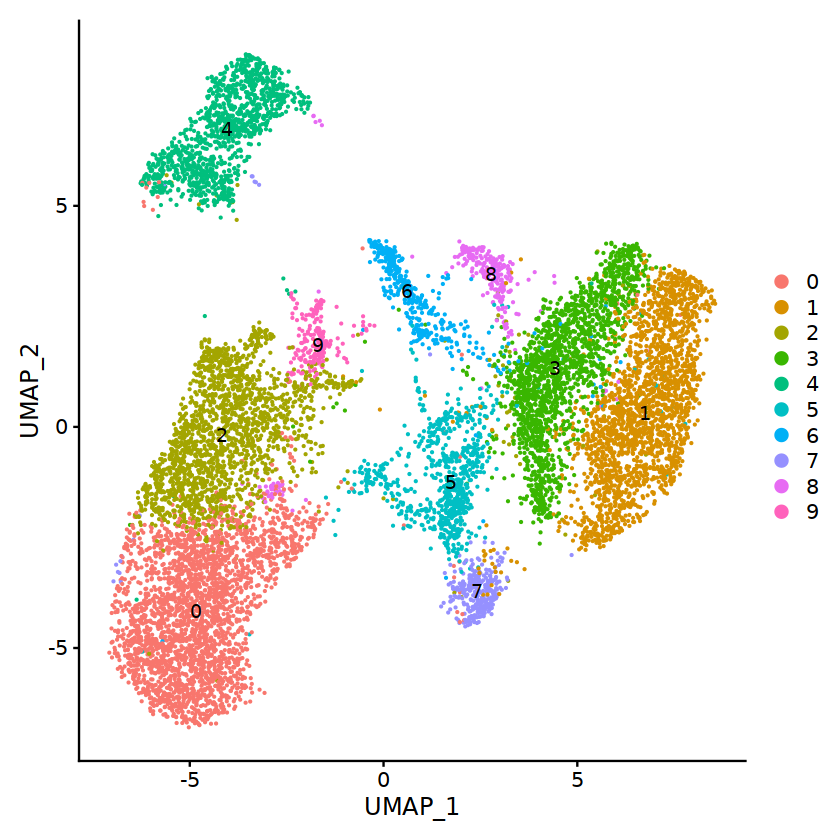

In [12]:
 plot1

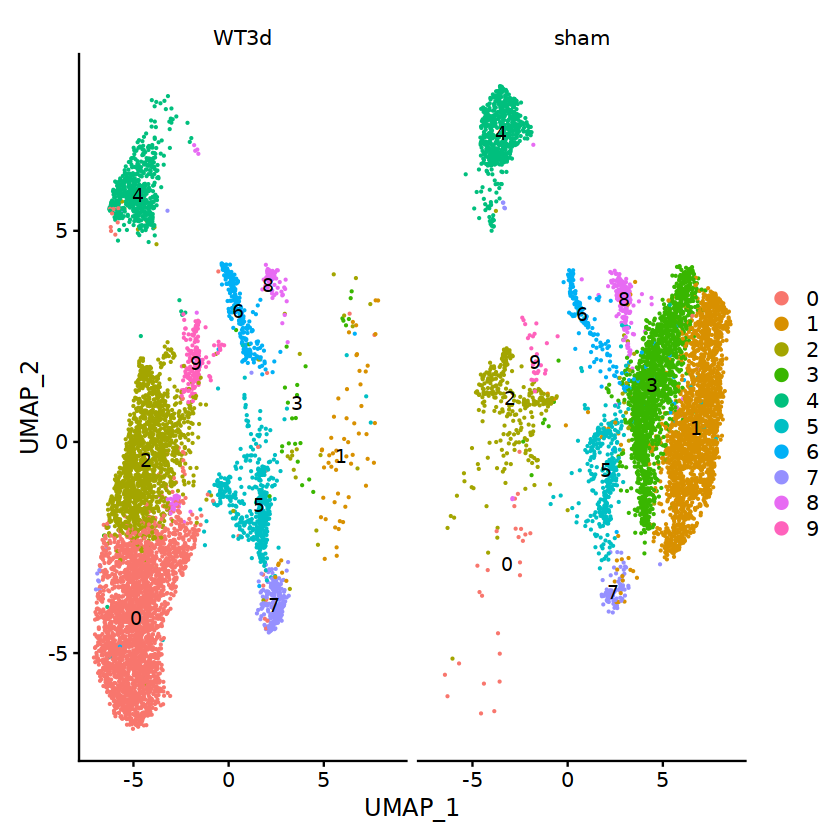

In [13]:
DimPlot(scRNA_harmony, reduction = "umap", label=T,split.by = 'orig.ident') 

In [14]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [15]:
ggsave('rm.batch.by.harmony.pdf',width = 7,height = 7)

In [16]:
DefaultAssay(scRNA_harmony) = 'integrated'

In [17]:
Idents(scRNA_harmony) = 'orig.ident'

In [18]:
DefaultAssay(scRNA_harmony) = 'RNA'

In [19]:
Idents(scRNA_harmony) = 'seurat_clusters'

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



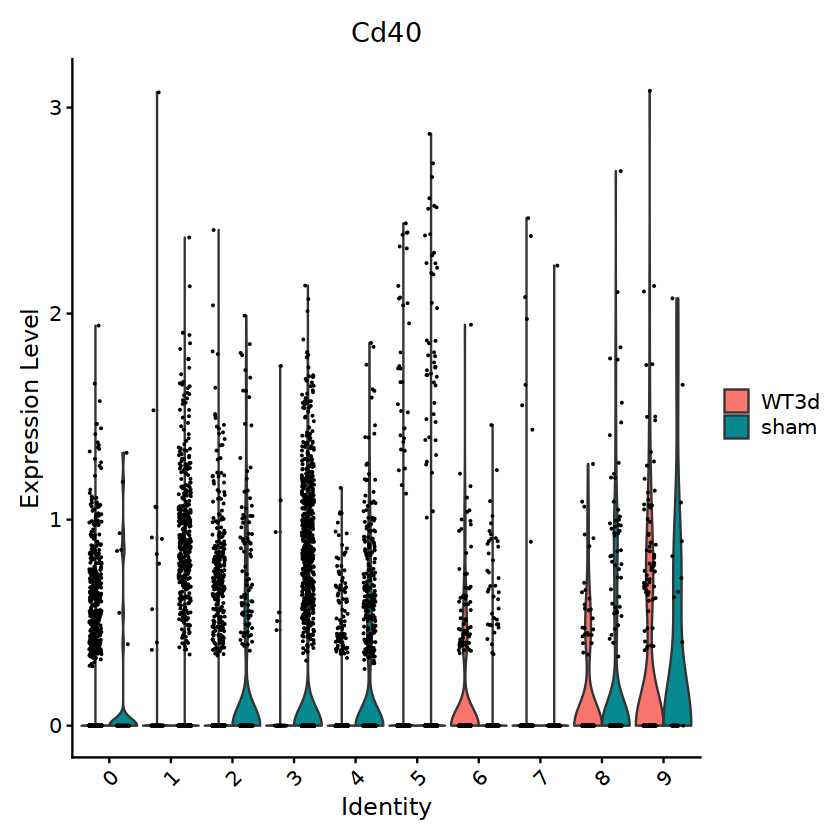

In [20]:
VlnPlot(scRNA_harmony,features = c('Cd40'),split.by = 'orig.ident') 

In [21]:
table(scRNA_harmony$orig.ident)


WT3d sham 
6184 5692 

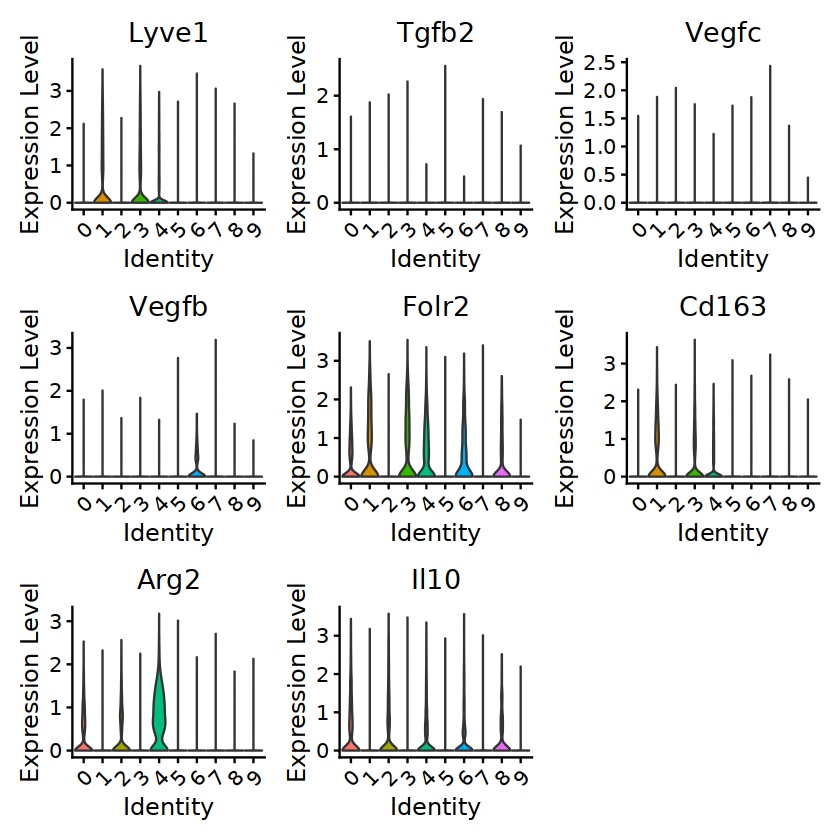

In [30]:
VlnPlot(scRNA_harmony,features = c('Lyve1','Tgfb2','Vegfc','Vegfb','Folr2','Cd163','Arg2','Il10'),pt.size = 0) 

In [23]:
table(scRNA_harmony$orig.ident)


WT3d sham 
6184 5692 

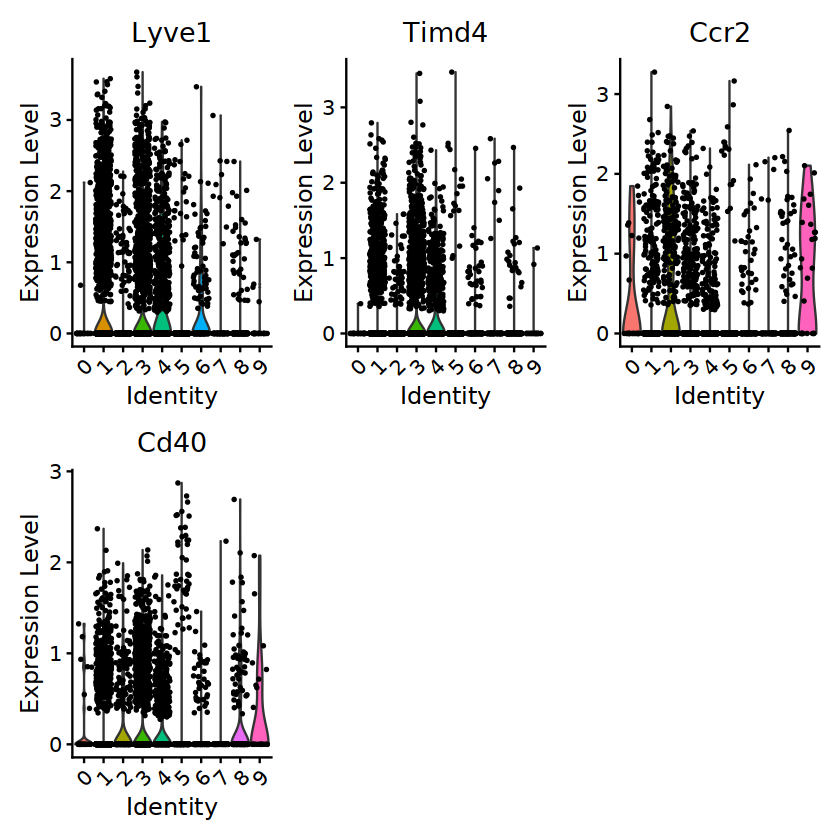

In [35]:
Idents(scRNA_harmony) = 'orig.ident'

sham = subset(scRNA_harmony,idents = 'sham')

DefaultAssay(sham)='RNA'

Idents(sham) = 'seurat_clusters'

VlnPlot(sham,features = c('Lyve1','Timd4','Ccr2','Cd40'),pt.size = 0.5)

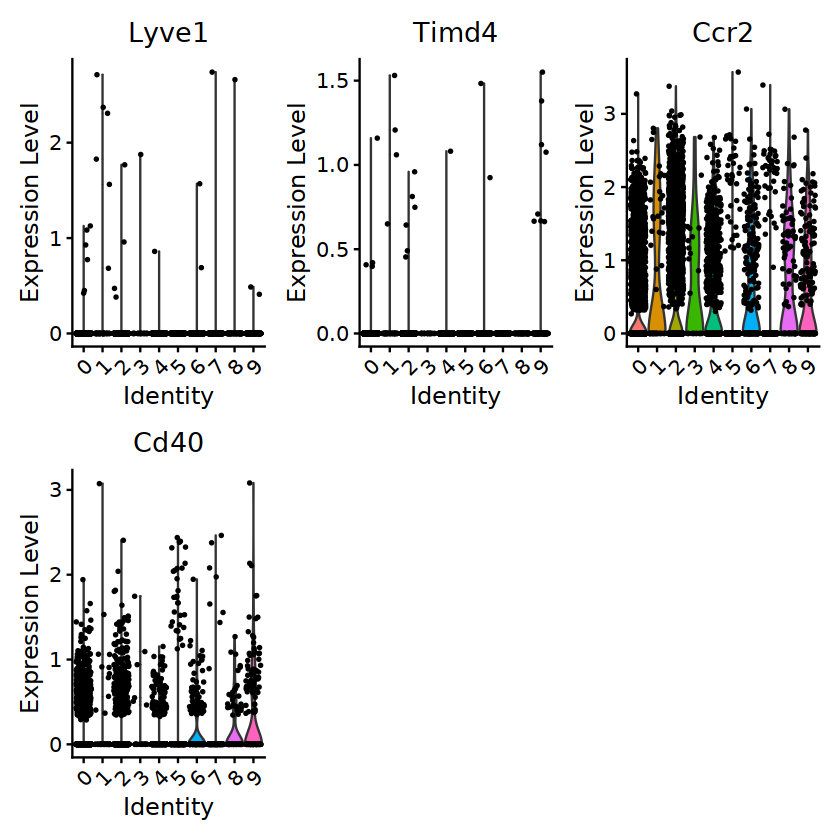

In [36]:
Idents(scRNA_harmony) = 'orig.ident'

WT3d = subset(scRNA_harmony,idents = 'WT3d')

DefaultAssay(WT3d)='RNA'

Idents(WT3d) = 'seurat_clusters'

VlnPlot(WT3d,features = c('Lyve1','Timd4','Ccr2','Cd40'),pt.size = 0.5)

In [20]:
#Idents(scRNA_harmony) = 'seurat_clusters'
DefaultAssay(scRNA_harmony) = 'RNA'


sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [21]:
write.csv(sce.markers,file ='harmony.diff.gene.csv')

In [22]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)
library(ggplot2)

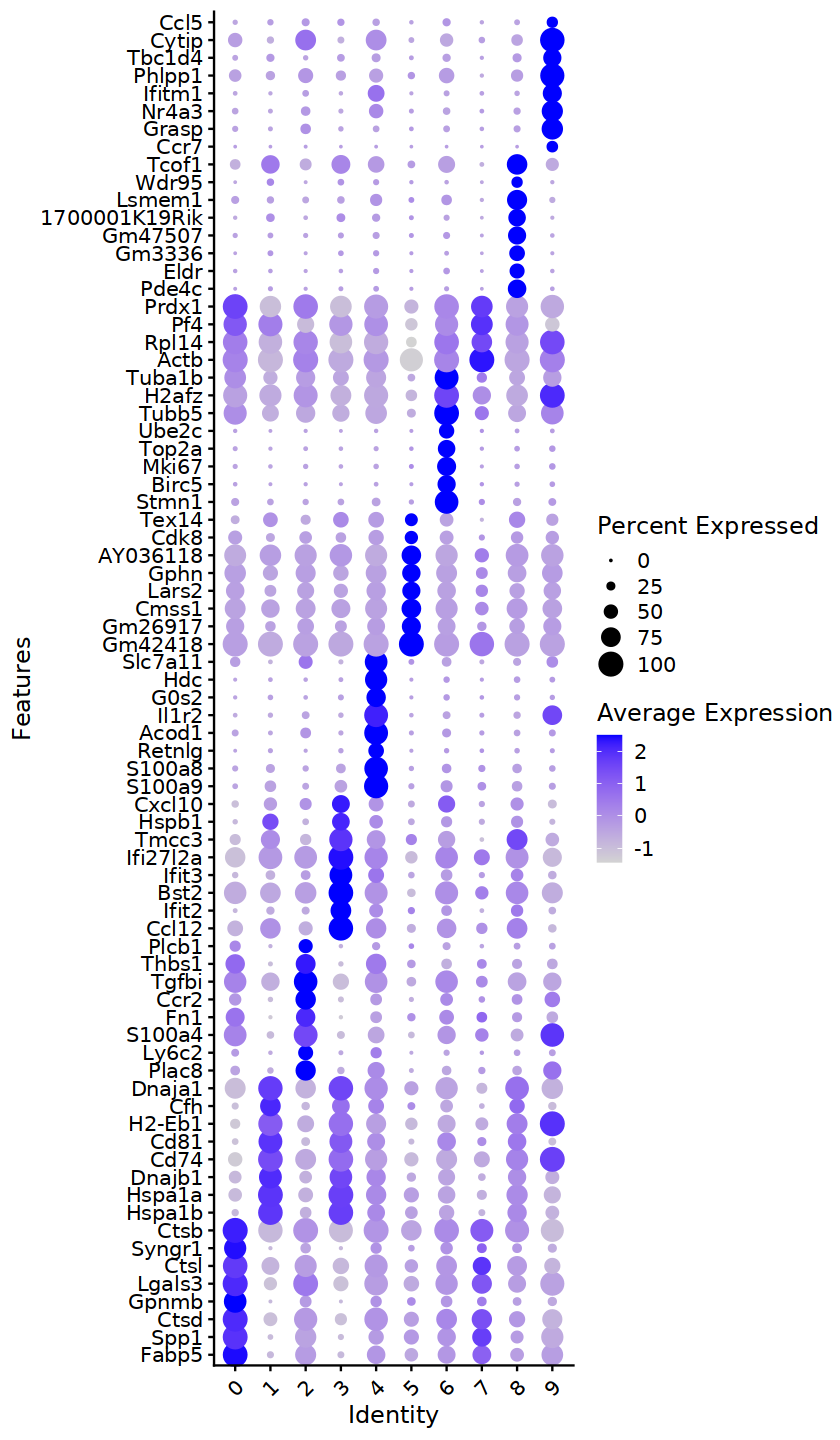

In [25]:
options(repr.plot.height = 12)
# n1 = replace(unique(top5$gene),11:13,c('Cd14','Vcan','Ly6c2'))
# n2 = replace(n1,16:17,c('Spp1','Gpnmb'))
# n3 = replace(n2,40,c('Xcr1'))
DotPlot(scRNA_harmony, features = unique(top5$gene),
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [24]:
ggsave('harmony.marker.pdf',height = 9)

Saving 6.67 x 9 in image


In [ ]:
0 Trem2 Spp1
1 Cd74 H2-Eb1 H2-Aa  RTM MHCII
2  Ly6c hi mono Plac8
3  RTM TIMD4 LYVE1 fOLR2
4  S100a9/8, Retnlg, and Lcn2  
5 mt相关基因
6 proliferating marco  Top2a Mki67 Stmn1

7 Pf4 
8 Pde4c
9  cd209a H2-DMb2